In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
NUM_CLASSES = 0


In [2]:
from tensorflow import keras
import keras_tuner as kt


In [3]:
model_save_path = './model'


In [4]:
data_frame = pd.read_csv(
    "C:/Users/shubham/Documents/git/iwsh/machine_learning/data/number/number.csv")
data_frame.drop(["uid"], axis=1, inplace=True)

for i in range(0, 21):
    data_frame.drop([f"z{i}"], axis=1, inplace=True)


In [5]:
print(data_frame.shape)
data_frame.head()


(14390, 44)


,hand,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,gesture
0,1,0.198411,0.747025,0.235151,0.738667,0.268972,0.697697,0.268697,0.654425,0.253942,...,0.664134,0.147525,0.622553,0.166481,0.619918,0.177274,0.658618,0.176243,0.672592,0
1,1,0.193464,0.728339,0.234930,0.710548,0.268882,0.653667,0.280233,0.601220,0.262587,...,0.632698,0.152037,0.597635,0.170634,0.575411,0.180758,0.614971,0.179107,0.638144,0
2,1,0.201815,0.668465,0.249525,0.622076,0.285454,0.563580,0.302071,0.503236,0.287489,...,0.542387,0.171598,0.500202,0.207042,0.479684,0.213964,0.526689,0.198493,0.541396,0
3,1,0.206287,0.617647,0.253612,0.584835,0.287096,0.523315,0.305104,0.463736,0.292773,...,0.504872,0.178925,0.460736,0.217125,0.442216,0.221329,0.489974,0.204648,0.504209,0
4,1,0.204903,0.588751,0.250742,0.558584,0.286239,0.495493,0.306021,0.438340,0.289818,...,0.485219,0.171706,0.440263,0.205936,0.419783,0.213251,0.468543,0.200633,0.485689,0


In [6]:
NUM_CLASSES = len(set(data_frame["gesture"]))


In [7]:
features = data_frame.drop(["gesture"], axis=1)
value = data_frame["gesture"]


In [8]:
features = features.to_numpy()
value = value.to_numpy()


In [9]:
#{0, 1, 5, 6, 7, 8}

flag = 0

for i in set(data_frame["gesture"]):
    value[value == i] = flag
    flag += 1


In [10]:
import numpy as np
np.unique(value)


array([0, 1, 2, 3, 4, 5], dtype=int64)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    features, value, train_size=0.95, random_state=RANDOM_SEED)


In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [14]:
from tensorflow.keras import layers


def model_builder(hp):
    with tf.device("/GPU:0"):
        model = keras.Sequential()
        for i in range(hp.Int('num_layers', 2, 20)):
            model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                                min_value=32,
                                                max_value=512,
                                                step=32),
                                   activation='relu'))
        model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
        return model


In [15]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=100,
    executions_per_trial=3,
    directory='number',
    project_name='number'
)

INFO:tensorflow:Reloading Oracle from existing project number\number\oracle.json
INFO:tensorflow:Reloading Tuner from number\number\tuner0.json


In [16]:
tuner.search_space_summary()

Search space summary
Default search space size: 21
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [17]:
tuner.search(X_train, y_train,
             epochs=10,
             validation_data=(X_test, y_test))


Search: Running Trial #58

Value             |Best Value So Far |Hyperparameter
15                |4                 |num_layers
256               |320               |units_0
224               |352               |units_1
0.0001            |0.001             |learning_rate
384               |448               |units_2
64                |384               |units_3
96                |320               |units_4
384               |32                |units_5
288               |288               |units_6
352               |320               |units_7
160               |32                |units_8
352               |32                |units_9
288               |352               |units_10
480               |160               |units_11
128               |64                |units_12
512               |480               |units_13
192               |64                |units_14
352               |160               |units_15
416               |64                |units_16
160               |320       

KeyboardInterrupt: 

In [17]:
tuner.results_summary()

'''
Trial summary
Hyperparameters:
num_layers: 4
units_0: 320
units_1: 352
learning_rate: 0.001
units_2: 448
units_3: 384
units_4: 320
units_5: 32
units_6: 288
units_7: 320
units_8: 32
units_9: 32
units_10: 352
units_11: 160
units_12: 64
units_13: 480
units_14: 64
units_15: 160
units_16: 64
units_17: 320
units_18: 480
Score: 0.9666666587193807
'''


Results summary
Results in number\number
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 4
units_0: 320
units_1: 352
learning_rate: 0.001
units_2: 448
units_3: 384
units_4: 320
units_5: 32
units_6: 288
units_7: 320
units_8: 32
units_9: 32
units_10: 352
units_11: 160
units_12: 64
units_13: 480
units_14: 64
units_15: 160
units_16: 64
units_17: 320
units_18: 480
Score: 0.9666666587193807
Trial summary
Hyperparameters:
num_layers: 8
units_0: 448
units_1: 288
learning_rate: 0.0001
units_2: 512
units_3: 96
units_4: 64
units_5: 512
units_6: 288
units_7: 288
units_8: 416
units_9: 352
units_10: 224
units_11: 480
units_12: 352
units_13: 320
units_14: 512
units_15: 64
units_16: 192
units_17: 64
units_18: 160
Score: 0.9638888835906982
Trial summary
Hyperparameters:
num_layers: 2
units_0: 128
units_1: 448
learning_rate: 0.001
units_2: 224
units_3: 224
units_4: 160
units_5: 512
units_6: 480
units_7: 512
units_8: 96
units_9: 160
units_10: 512
units_11: 448
units_12: 32
units_13: 448

'\nTrial summary\nHyperparameters:\nnum_layers: 4\nunits_0: 320\nunits_1: 352\nlearning_rate: 0.001\nunits_2: 448\nunits_3: 384\nunits_4: 320\nunits_5: 32\nunits_6: 288\nunits_7: 320\nunits_8: 32\nunits_9: 32\nunits_10: 352\nunits_11: 160\nunits_12: 64\nunits_13: 480\nunits_14: 64\nunits_15: 160\nunits_16: 64\nunits_17: 320\nunits_18: 480\nScore: 0.9666666587193807\n'

In [18]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(((21 * 2) + 1, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(256, activation=tf.nn.sigmoid),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

# # Model checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(
#     model_save_path, verbose=1, save_weights_only=False)
# # Callback for early stopping
# es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# model.compile(
#     optimizer='adam',
#     loss='sparse_categorical_crossentropy',
#     metrics=['accuracy']
# )

# model.fit(
#     X_train,
#     y_train,
#     epochs=1000,
#     batch_size=128,
#     validation_data=(X_test, y_test),
# )

# val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)
# print(val_loss, val_acc)

# model = tf.keras.models.load_model(model_save_path)

# predict_result = model.predict(np.array([X_test[10]]))
# print(np.squeeze(predict_result))
# print(np.argmax(np.squeeze(predict_result)))

In [19]:

model = tuner.hypermodel.build(best_hps)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/50
107/107 [==============================] - 2s 9ms/step - loss: 1.1303 - accuracy: 0.5635 - val_loss: 0.5955 - val_accuracy: 0.7861
Epoch 2/50
107/107 [==============================] - 1s 6ms/step - loss: 0.4959 - accuracy: 0.8379 - val_loss: 0.2874 - val_accuracy: 0.9167
Epoch 3/50
107/107 [==============================] - 1s 6ms/step - loss: 0.3026 - accuracy: 0.9093 - val_loss: 0.2459 - val_accuracy: 0.9306
Epoch 4/50
107/107 [==============================] - 1s 6ms/step - loss: 0.2890 - accuracy: 0.9089 - val_loss: 0.2624 - val_accuracy: 0.9167
Epoch 5/50
107/107 [==============================] - 1s 6ms/step - loss: 0.2176 - accuracy: 0.9360 - val_loss: 0.2367 - val_accuracy: 0.9306
Epoch 6/50
107/107 [==============================] - 1s 6ms/step - loss: 0.2082 - accuracy: 0.9374 - val_loss: 0.1761 - val_accuracy: 0.9444
Epoch 7/50
107/107 [==============================] - 1s 6ms/step - loss: 0.1752 - accuracy: 0.9480 - val_loss: 0.1245 - val_accuracy: 0.9708
Epoch 

In [20]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)
print(val_loss, val_acc)

6/6 [==============================] - 0s 4ms/step - loss: 0.0803 - accuracy: 0.9750
0.08028140664100647 0.9750000238418579


KeyboardInterrupt: 

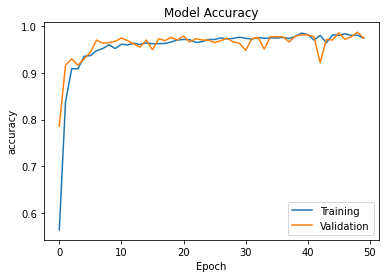

In [31]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.savefig('model_accuracy.jpg', dpi=1000)
plt.show()

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 320)               14080     
                                                                 
 dense_4 (Dense)             (None, 352)               112992    
                                                                 
 dense_5 (Dense)             (None, 448)               158144    
                                                                 
 dense_6 (Dense)             (None, 384)               172416    
                                                                 
 dense_7 (Dense)             (None, 6)                 2310      
                                                                 
Total params: 459,942
Trainable params: 459,942
Non-trainable params: 0
_________________________________________________________________


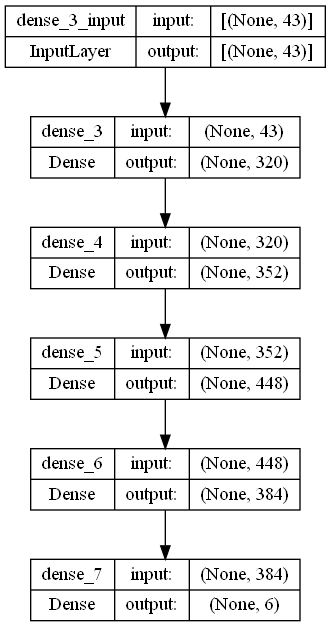

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [24]:
model.save(model_save_path)

INFO:tensorflow:Assets written to: ./model\assets


In [ ]:
model = tf.keras.models.load_model(model_save_path)

In [25]:
observation = 100

predict_result = model.predict(np.array([X_test[observation]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))
print(np.array([y_test[observation]]))

1/1 [==============================] - 0s 82ms/step
[8.6655105e-10 8.6833687e-09 1.8305681e-08 9.9999321e-01 6.6068251e-06
 2.3427852e-07]
3
[3]
